In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [49]:
housing = pd.read_csv("Bengaluru_House_Data.csv")
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [51]:
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [52]:
housing_clean = housing.copy()

In [53]:
housing_clean[pd.isnull(housing_clean["size"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [54]:
housing_clean.dropna(axis=0, thresh = 7, inplace = True)

In [55]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [56]:
housing_clean[pd.isnull(housing_clean["location"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [57]:
housing_clean[housing_clean["society"] == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [58]:
housing_clean["location"] =  housing_clean["location"].replace(to_replace = np.nan, value = "Anantapura")

In [59]:
housing_clean["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [60]:
housing_clean["bhk"] = housing_clean["size"].apply(lambda x: int(x.split(" ")[0]))

In [61]:
housing_clean[pd.isnull(housing_clean["bath"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,3
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530,1
669,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6640,NaN,NaN,375.000,5
702,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400 - 6800,NaN,NaN,548.500,5
801,Super built-up Area,18-Dec,JP Nagar,4 BHK,Pehtsa,4000 - 5249,NaN,NaN,453.000,4
941,Super built-up Area,Ready To Move,Whitefield,4 Bedroom,PrOakSi,3606 - 5091,NaN,NaN,304.000,4
1264,Built-up Area,18-May,Hennur,3 Bedroom,Asoilul,2264,NaN,NaN,155.000,3
1267,Super built-up Area,18-Jun,Yelahanka,3 BHK,Shalkri,1440 - 1884,NaN,NaN,67.980,3


In [62]:
def IsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

housing_clean[~housing_clean["total_sqft"].apply(IsFloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


In [63]:
def IsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

metrics = []

def ConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def ExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if IsFloat(x[0:intIndex]):
                    return ConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [64]:
housing_clean["sqft"] = housing_clean["total_sqft"].apply(ExtractTotalSqft)

In [65]:
housing_clean["sqft"].describe()

count    1.330400e+04
mean     1.911209e+03
std      1.728725e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276000e+03
75%      1.680000e+03
max      1.306800e+06
Name: sqft, dtype: float64

In [66]:
housing_clean.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1200.0


In [67]:
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
sqft               0
dtype: int64

In [68]:
def FillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["bath"])

bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts()
housing_clean["bath"] = housing_clean.apply(lambda row: FillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [69]:
def FillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["balcony"])
bhk_groupby_balcony = housing_clean.groupby("bhk")["balcony"].value_counts()
housing_clean["balcony"] = housing_clean.apply(lambda row: FillBalcony(bhk_groupby_balcony, row), axis=1)

In [70]:
housing_clean.drop(["society", "size", "total_sqft"], inplace = True, axis=1)

In [71]:
housing_clean.isnull().sum()

area_type       0
availability    0
location        0
bath            0
balcony         0
price           0
bhk             0
sqft            0
dtype: int64

In [72]:
housing_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5,3,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2,3,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,1,51.00,2,1200.0


In [73]:
def RelabelAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""
housing_clean["availability"] = housing_clean["availability"].apply(RelabelAvailability)

In [74]:
housing_clean["location"] = housing_clean["location"].apply(lambda x: x.strip())
unique_location_count = housing_clean.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count_10 = unique_location_count[unique_location_count <= 10]
housing_clean["location"] = housing_clean["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [75]:
housing_clean["price_per_sqft"] = housing_clean["price"] * 100000 / housing_clean["sqft"]

In [76]:
housing_clean["sqft_per_bhk"] = housing_clean["sqft"] / housing_clean["bhk"]

In [77]:
housing_clean = housing_clean[housing_clean['price_per_sqft'] < housing_clean['price_per_sqft'].quantile(0.99)]

In [78]:
housing_clean[housing_clean["sqft_per_bhk"] < 300].count()

area_type         709
availability      709
location          709
bath              709
balcony           709
price             709
bhk               709
sqft              709
price_per_sqft    709
sqft_per_bhk      709
dtype: int64

In [79]:
housing_clean[housing_clean["sqft_per_bhk"] > 1500].count()

area_type         95
availability      95
location          95
bath              95
balcony           95
price             95
bhk               95
sqft              95
price_per_sqft    95
sqft_per_bhk      95
dtype: int64

In [80]:
housing_clean['sqft_per_bhk'] = housing_clean['sqft'] / housing_clean['bhk']
housing_clean = housing_clean[~(housing_clean['sqft_per_bhk'] < 300)]
housing_clean = housing_clean[~(housing_clean['sqft_per_bhk'] > 1200)]

In [81]:
housing_clean = housing_clean[~(housing_clean["sqft"] > 6000)]

In [82]:
housing_clean.sort_values(["price"], ascending=False)

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
1873,Plot Area,Ready To Move,Kasavanhalli,7,5,1200.0,5,5800.0000,20689.655172,1160.000000
6190,Super built-up Area,Soon to be Vacated,Other,6,1,1102.0,4,4750.0000,23200.000000,1187.500000
13086,Super built-up Area,Ready To Move,Other,7,5,988.0,5,5665.8400,17437.837990,1133.168000
7447,Super built-up Area,Ready To Move,Other,5,5,980.0,5,4900.0000,20000.000000,980.000000
6274,Plot Area,Soon to be Vacated,Other,5,7,972.0,7,5400.0000,18000.000000,771.428571
...,...,...,...,...,...,...,...,...,...,...
5410,Super built-up Area,Ready To Move,Attibele,1,1,10.0,1,400.0000,2500.000000,400.000000
11091,Built-up Area,Ready To Move,Attibele,1,1,10.0,1,410.0000,2439.024390,410.000000
4113,Super built-up Area,Soon to be Vacated,BTM Layout,3,2,10.0,3,1797.5713,556.306167,599.190433
12579,Super built-up Area,Ready To Move,Chandapura,1,1,10.0,1,410.0000,2439.024390,410.000000


In [83]:
housing_clean = housing_clean[~(housing_clean["price_per_sqft"] > 20000)]

In [84]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) 
    return df.drop(exclude_indices,axis='index')
housing_clean = remove_bhk_outliers(housing_clean)

In [85]:
housing_clean = housing_clean[housing_clean.bath < housing_clean.bhk+2]
housing_clean.shape

(8498, 10)

In [86]:
housing_clean.drop(columns = ["area_type", "availability", "location"]).corr()["price"].sort_values(ascending=False)


price             1.000000
sqft              0.820807
price_per_sqft    0.782903
bath              0.650978
bhk               0.634278
sqft_per_bhk      0.470972
balcony           0.295589
Name: price, dtype: float64

In [87]:
housing_clean.drop(["price_per_sqft", "sqft_per_bhk", "balcony"], axis = 1, inplace = True)

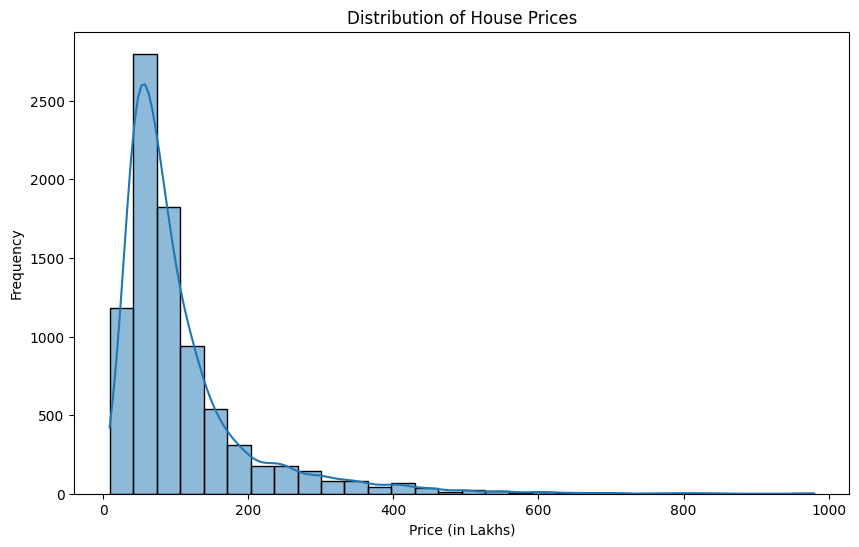

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_clean['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Frequency")
plt.show()

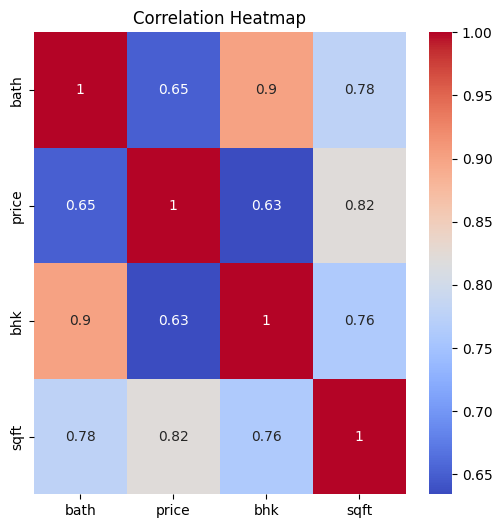

In [89]:
plt.figure(figsize=(6, 6))
sns.heatmap(housing_clean.drop(columns = ["area_type", "availability", "location"]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [90]:
housing_clean.to_csv("Cleaned_data.csv")

In [100]:
from sklearn.model_selection import train_test_split
X = housing_clean.drop(columns = "price")
y = housing_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) 

In [101]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [102]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ["area_type", "availability", "location"]), remainder='passthrough')

In [103]:
scaler = StandardScaler()
lr = LinearRegression()
la = Lasso()
ri = Ridge()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dt = DecisionTreeRegressor()

In [104]:
Regressors = {
    'Linear Regression' : lr,
    'Lasso' : la, 
    'Ridge': ri,
    'XGBRegressor': xgb,
    'RandomForestRegressor': rfr, 
    'AdaBoostRegressor': ada, 
    'gradient Boost Regressor': gbr, 
    'Decision Tree Regressor': dt
}

In [105]:
for name,model in Regressors.items():
    pipe = make_pipeline(column_trans, scaler,model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("For ",name)
    print("R2 Score ",r2_score(y_test,y_pred))
    print("MSE ",mean_squared_error(y_test,y_pred))
    print("==================================================")

For  Linear Regression
R2 Score  0.7818282235898898
MSE  1920.9514658128728
For  Lasso
R2 Score  0.7720636090619187
MSE  2006.9266130076428
For  Ridge
R2 Score  0.7818537027238243
MSE  1920.727127997577
For  XGBRegressor
R2 Score  0.8031815588873922
MSE  1732.9403425838734
For  RandomForestRegressor
R2 Score  0.7587471528587302
MSE  2124.174895456714
For  AdaBoostRegressor
R2 Score  0.6778956172871358
MSE  2836.0537568064374
For  gradient Boost Regressor
R2 Score  0.7887729649577345
MSE  1859.8046422880207
For  Decision Tree Regressor
R2 Score  0.6590296926399473
MSE  3002.1638110089057


In [97]:
pipe = make_pipeline(column_trans, scaler,xgb)
pipe.fit(X_train, y_train)

c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'location'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsamp...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [98]:
housing_clean.head(1)

,area_type,availability,location,bath,price,bhk,sqft
0,Super built-up Area,Soon to be Vacated,Electronic City Phase II,2,39.07,2,1056.0


In [99]:
import pickle
pickle.dump(pipe,open("Model.pkl",'wb'))